<a href="https://colab.research.google.com/github/gongx030/Etv2_pioneer/blob/master/BRG1_profile_of_TFs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ChIP-Seq  and ATAC-Seq Profile

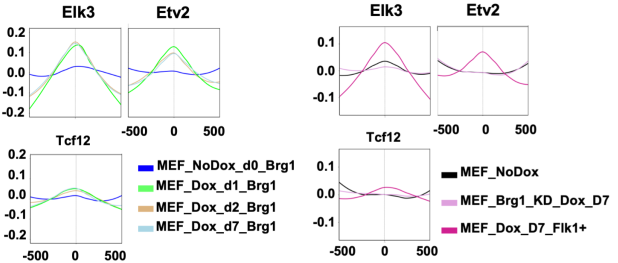

In [1]:
start_time0 <- Sys.time()

In [2]:
system('apt-get -q install libgsl-dev', intern = TRUE)
system('apt-get install libcairo2-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following package was automatically installed and is no longer required:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [5] "  libnvidia-common-460"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
 [6] "Use 'apt autoremove' to remove it."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
 [7] "The following additional packages will be installed:"                                                                  

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following package was automatically installed and is no longer required:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [5] "  libnvidia-common-460"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
 [6] "Use 'apt autoremove' to remove it."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
 [7] "The following additional packages will be installed:"                                                                  

In [3]:
install.packages(c('gsl', 'devtools'))
install.packages('Cairo')
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install(c(
  'chromVAR', 'BSgenome.Mmusculus.UCSC.mm10', 'motifmatchr', 'BiocParallel', 'SummarizedExperiment', 'gplots', 'circlize', 'plyr', 'dplyr', 
  'DESeq2', 'VennDiagram', 'ggwordcloud', 'GenomicRanges',
  'BBmisc'
))
devtools::install_github("GreenleafLab/chromVARmotifs")
devtools::install_github("jokergoo/ComplexHeatmap")
devtools::install_github("jokergoo/EnrichedHeatmap")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.12 (BiocManager 1.30.15), R 4.0.5 (2021-03-31)

Installing package(s) 'BiocVersion', 'chromVAR',
  'BSgenome.Mmusculus.UCSC.mm10', 'motifmatchr', 'BiocParallel',
  'SummarizedExperiment', 'gplots', 'circlize', 'plyr', 'dplyr', 'DESeq2',
  'VennDiagram', 'ggwordcloud', 'GenomicRanges'

also installing the dependencies ‘pracma’, ‘R.oo’, ‘R.methodsS3’, ‘bit’, ‘GenomicAlignments’, ‘reshape2’, ‘poweRlaw’, ‘GO.db’, ‘R.utils’, ‘KEGGREST’, ‘bit64’, ‘plogr’, ‘sass’, ‘jquerylib’, ‘formatR’, ‘RCurl’, ‘GenomeInfoDbData’, ‘RcppEigen’, ‘CNEr’, ‘DirichletMultinomial’, ‘RSQL

cachem  (1.0.4 -> 1.0.5) [CRAN]
pillar  (1.6.0 -> 1.6.1) [CRAN]
fansi   (0.4.2 -> 0.5.0) [CRAN]
stringi (1.5.3 -> 1.6.2) [CRAN]
openssl (1.4.3 -> 1.4.4) [CRAN]
hms     (1.0.0 -> 1.1.0) [CRAN]
tibble  (3.1.1 -> 3.1.2) [CRAN]


Installing 7 packages: cachem, pillar, fansi, stringi, openssl, hms, tibble

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/Rtmp90OHtV/remotes3a61b1f844/GreenleafLab-chromVARmotifs-38bed55/DESCRIPTION’
─  preparing ‘chromVARmotifs’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘chromVARmotifs_0.2.0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




iterators  (NA -> 1.0.13) [CRAN]
foreach    (NA -> 1.5.1 ) [CRAN]
rjson      (NA -> 0.2.20) [CRAN]
doParallel (NA -> 1.0.16) [CRAN]
clue       (NA -> 0.3-59) [CRAN]
GetoptLong (NA -> 1.0.5 ) [CRAN]


Installing 6 packages: iterators, foreach, rjson, doParallel, clue, GetoptLong

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/Rtmp90OHtV/remotes3a5d2b5a47/jokergoo-ComplexHeatmap-7b75119/DESCRIPTION’
─  preparing ‘ComplexHeatmap’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
     NB: this package now depends on R (>= 3.5.0)
─  building ‘ComplexHeatmap_2.7.11.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





✔  checking for file ‘/tmp/Rtmp90OHtV/remotes3a76258f18/jokergoo-EnrichedHeatmap-c129fab/DESCRIPTION’
─  preparing ‘EnrichedHeatmap’:
✔  checking DESCRIPTION meta-information
─  cleaning src
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Removed empty directory ‘EnrichedHeatmap/test’
─  building ‘EnrichedHeatmap_1.21.1.1000.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(tidyverse)
library(chromVARmotifs)
library(chromVAR)
library(BSgenome.Mmusculus.UCSC.mm10)
library(motifmatchr)
library(BiocParallel)
library(SummarizedExperiment)
library(gplots)
library(circlize)
library(ComplexHeatmap)
register(MulticoreParam(4)) # Use 8 cores
library(plyr)
library(dplyr)
library(DESeq2)
library(VennDiagram)
library(ggwordcloud)
library(GenomicRanges)
library(EnrichedHeatmap)
library(tidyr)
library(BBmisc)


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Loading required package: BSgenome

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are ma

# Etv2 Binding sites for whole genome

In [3]:
wgr <- GRanges(seqnames = c('chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chrX','chrY','chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19'),
ranges = IRanges(start = c(3073252,3065572,3004129,3051713,3000115,3051288,3046371,3056293,3000921,3076874,206150,3104118,3125903,3023882,3008719,3000668,3053107,3009195,3042023,3015907,3134644),
end = c(195323493,182003861,159916361,156355905,151702468,149583656,145324086,129271868,124493793,170869960,90844040,130592705,121970685,120000968,120318076,124742797,103899290,98082450,94877497,90592528,61305037)))

In [4]:
etv2_binding <-  matchMotifs(
homer_pwms[['Etv2(ETS)/ES-ER71-ChIP-Seq(GSE59402)/Homer(0.967)']], 
wgr,
genome = BSgenome.Mmusculus.UCSC.mm10,
p.cutoff = 5e-05,
out = 'positions'
)[[1]]

In [5]:
gr <- resize(etv2_binding, width = 200, fix = 'center')
gr0 <- reduce(gr) 
mm <- as.matrix(findOverlaps(gr, gr0))
sp <- split(mm[, 1], list(mm[, 2]))
j <- unlist(mclapply(sp, function(i) i[which.max(gr$score[i])], mc.cores = 4))
gr <- gr[j]

In [6]:
blacklist_file <- 'https://s3.msi.umn.edu/gongx030/datasets/datasets=blacklists_version=20190827a/mm10.blacklist.bed.gz'
blacklist <- blacklist_file %>%
  url() %>%
  gzcon() %>%
  readLines() %>%
  textConnection() %>%
  read.table(header = TRUE, sep = '\t')
blacklist <- GRanges(seqnames = blacklist[, 1], range = IRanges(blacklist[, 2], blacklist[, 3]))

gr <- gr[!gr %over% blacklist]
gr

GRanges object with 591991 ranges and 1 metadata column:
           seqnames            ranges strand |     score
              <Rle>         <IRanges>  <Rle> | <numeric>
       [1]     chr1   3075060-3075259      + |   8.43201
       [2]     chr1   3086282-3086481      + |   8.16614
       [3]     chr1   3091737-3091936      + |   8.59925
       [4]     chr1   3119210-3119409      + |   8.08373
       [5]     chr1   3140853-3141052      + |   7.73117
       ...      ...               ...    ... .       ...
  [591987]    chr19 61273703-61273902      - |   7.75669
  [591988]    chr19 61279876-61280075      - |   7.82944
  [591989]    chr19 61280514-61280713      - |   7.98608
  [591990]    chr19 61299787-61299986      - |   8.15429
  [591991]    chr19 61300358-61300557      - |   7.85292
  -------
  seqinfo: 21 sequences from an unspecified genome; no seqlengths

# ChIP-Seq

## Reading ChIP-Seq data for Brg1 to be used for looking at average profile +500/-500 kb region of transcription factor (Etv2, Elk3, Nfe2l2, Tcf12, Hbp1)

In [7]:
s3_bw_files <- c(
  'MEF_Dox_d1_Brg1' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d1_Brg1_FE.bw',
  'MEF_Dox_d2_Brg1' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d2_Brg1_FE.bw',
  'MEF_Dox_d7_Brg1' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d7_Brg1_FE.bw',
  'MEF_NoDox_d0_Brg1' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_NoDox_d0_Brg1_FE.bw'
)

In [8]:
for (i in 1:length(s3_bw_files)){
  sprintf('wget -x -c -nH %s', s3_bw_files[i]) %>% system()
}

In [9]:
s3_bw_files <- gsub('https://s3.msi.umn.edu/', './', s3_bw_files)
message(sprintf('all bw_files exist: %s', all(file.exists(s3_bw_files))))

all bw_files exist: TRUE



In [10]:
motif_bp <- matchMotifs(mouse_pwms_v2, resize(gr, fix = 'center', width = 500), genome = BSgenome.Mmusculus.UCSC.mm10, out = 'positions')

In [11]:
motif_ix <- matchMotifs(mouse_pwms_v2, resize(gr, fix = 'center', width = 500), genome = BSgenome.Mmusculus.UCSC.mm10)

In [12]:
motif_ix

class: RangedSummarizedExperiment 
dim: 591991 884 
metadata(0):
assays(1): motifMatches
rownames: NULL
rowData names(1): score
colnames(884): ENSMUSG00000021359_LINE1_Tcfap2a_D_N1
  ENSMUSG00000025927_LINE5_Tcfap2b_D ...
  ENSMUSG00000021540_LINE17865_Smad5_I_N1
  ENSMUSG00000027796_LINE17891_Smad9_I_N1
colData names(1): name

In [13]:
motif_bp

GRangesList object of length 884:
$ENSMUSG00000021359_LINE1_Tcfap2a_D_N1
GRanges object with 55736 ranges and 1 metadata column:
          seqnames            ranges strand |     score
             <Rle>         <IRanges>  <Rle> | <numeric>
      [1]     chr1   3186178-3186187      - |   6.06633
      [2]     chr1   3186178-3186187      - |   6.06633
      [3]     chr1   3445046-3445055      + |   6.54634
      [4]     chr1   3451738-3451747      - |   5.69954
      [5]     chr1   3491529-3491538      - |   5.73274
      ...      ...               ...    ... .       ...
  [55732]    chr19 60969329-60969338      - |   6.51516
  [55733]    chr19 60969542-60969551      - |   5.66953
  [55734]    chr19 61018031-61018040      - |   6.36914
  [55735]    chr19 61046106-61046115      - |   5.78919
  [55736]    chr19 61261269-61261278      - |   6.58455
  -------
  seqinfo: 21 sequences from an unspecified genome; no seqlengths

...
<883 more elements>

In [14]:
TF_motif <- unlist(motif_bp)

In [15]:
TF_motif

GRanges object with 43213087 ranges and 1 metadata column:
                                          seqnames            ranges strand |
                                             <Rle>         <IRanges>  <Rle> |
    ENSMUSG00000021359_LINE1_Tcfap2a_D_N1     chr1   3186178-3186187      - |
    ENSMUSG00000021359_LINE1_Tcfap2a_D_N1     chr1   3186178-3186187      - |
    ENSMUSG00000021359_LINE1_Tcfap2a_D_N1     chr1   3445046-3445055      + |
    ENSMUSG00000021359_LINE1_Tcfap2a_D_N1     chr1   3451738-3451747      - |
    ENSMUSG00000021359_LINE1_Tcfap2a_D_N1     chr1   3491529-3491538      - |
                                      ...      ...               ...    ... .
  ENSMUSG00000027796_LINE17891_Smad9_I_N1    chr19 60615358-60615367      - |
  ENSMUSG00000027796_LINE17891_Smad9_I_N1    chr19 60663141-60663150      + |
  ENSMUSG00000027796_LINE17891_Smad9_I_N1    chr19 60987388-60987397      + |
  ENSMUSG00000027796_LINE17891_Smad9_I_N1    chr19 61046387-61046396      - |
  ENS

In [16]:
mcols(TF_motif)$ENSG <- names(TF_motif)

In [17]:
mcols(TF_motif)$Gene <- colData(motif_ix)$name[match(mcols(TF_motif)$ENSG,rownames(colData(motif_ix)))]

In [18]:
TF_motif

GRanges object with 43213087 ranges and 3 metadata columns:
                                          seqnames            ranges strand |
                                             <Rle>         <IRanges>  <Rle> |
    ENSMUSG00000021359_LINE1_Tcfap2a_D_N1     chr1   3186178-3186187      - |
    ENSMUSG00000021359_LINE1_Tcfap2a_D_N1     chr1   3186178-3186187      - |
    ENSMUSG00000021359_LINE1_Tcfap2a_D_N1     chr1   3445046-3445055      + |
    ENSMUSG00000021359_LINE1_Tcfap2a_D_N1     chr1   3451738-3451747      - |
    ENSMUSG00000021359_LINE1_Tcfap2a_D_N1     chr1   3491529-3491538      - |
                                      ...      ...               ...    ... .
  ENSMUSG00000027796_LINE17891_Smad9_I_N1    chr19 60615358-60615367      - |
  ENSMUSG00000027796_LINE17891_Smad9_I_N1    chr19 60663141-60663150      + |
  ENSMUSG00000027796_LINE17891_Smad9_I_N1    chr19 60987388-60987397      + |
  ENSMUSG00000027796_LINE17891_Smad9_I_N1    chr19 61046387-61046396      - |
  EN

In [ ]:
#TF_motif <- readRDS('tf_motif.rds')

## Random background regions to test the chipseq profiles for Brg1

In [19]:
bg <- read.table('https://s3.msi.umn.edu/dsouz072/datasets/dataset=etv2_pioneer=20210404a/random.bed')

In [20]:
bg <- bg[,c(1:3, 6)]

In [21]:
colnames(bg) <- c('seqnames','start','end','strand')

In [22]:
bg <- bg[!grepl('random|un', bg$seqnames, ignore.case = TRUE),]

In [23]:
head(bg)

,seqnames,start,end,strand
,<chr>,<int>,<int>,<chr>
1,chr17,28047247,28048247,-
2,chr12,84941353,84942353,-
3,chr2,165046048,165047048,+
4,chr14,39755309,39756309,+
5,chrY,62716041,62717041,-
6,chr7,15177627,15178627,+


In [24]:
bg <- makeGRangesFromDataFrame(bg)

In [25]:
bg

GRanges object with 39918 ranges and 0 metadata columns:
        seqnames              ranges strand
           <Rle>           <IRanges>  <Rle>
      1    chr17   28047247-28048247      -
      2    chr12   84941353-84942353      -
      3     chr2 165046048-165047048      +
      4    chr14   39755309-39756309      +
      5     chrY   62716041-62717041      -
    ...      ...                 ...    ...
  39996     chr3 154011900-154012900      +
  39997    chr11   69996753-69997753      -
  39998     chr9   28284682-28285682      +
  39999    chr16   94136880-94137880      -
  40000     chr1 124047432-124048432      +
  -------
  seqinfo: 22 sequences from an unspecified genome; no seqlengths

In [26]:
set.seed(1)
bg <- sample(bg, size = 10000)

In [27]:
bg

GRanges object with 10000 ranges and 0 metadata columns:
        seqnames              ranges strand
           <Rle>           <IRanges>  <Rle>
  24438    chr19   14540775-14541775      +
   4059     chr1 188781402-188782402      +
  11593     chr1 144837580-144838580      -
  25226    chr12 107832031-107833031      -
  32691     chr1   33439470-33440470      -
    ...      ...                 ...    ...
   2762     chr6 138281940-138282940      +
   5425    chr13   76022244-76023244      +
  34867    chr18     8117202-8118202      -
   2085    chr17   20554592-20555592      +
  19419     chr5 143629923-143630923      +
  -------
  seqinfo: 22 sequences from an unspecified genome; no seqlengths

In [28]:
#saveRDS(bg, 'bg_random.rds')

## Randomly sampling 10000 regions for the profile plots 

In [29]:
tf <- c('Etv2','Elk3','Tcf12','Hbp1','Nfe2l2')

In [30]:
set.seed(2)
tf_sample <- lapply(tf, function(t){sample(TF_motif[(elementMetadata(TF_motif)[, "Gene"] %in% t)], size = 10000 )})

In [31]:
names(tf_sample) <- tf

In [32]:
tf_sample$BG <- bg

In [33]:
#saveRDS(tf_sample,'tf_sample.rds')

In [35]:
bw <- lapply(s3_bw_files, function(bw_file){lapply(tf_sample, function(t){
  rtracklayer::import.bw(
    bw_file, 
    which = trim(GenomicRanges::reduce(resize(t, fix = 'center', width = 1000)))
  ) 
})})

In [36]:
cvg <- lapply(names(bw), function(x){lapply(names(tf_sample), function(y){coverage(bw[[x]][[y]], weight = 'score')[resize(tf_sample[[y]], fix = 'center', width = 1001)] %>% as.matrix()})})
names(cvg) <- names(bw)
for (i in names(bw)){
  names(cvg[[i]]) <- names(tf_sample)
}

In [37]:
str(cvg)

List of 4
 $ MEF_Dox_d1_Brg1  :List of 6
  ..$ Etv2  : num [1:10000, 1:1001] 0.742 0.495 0.518 0.268 0.268 ...
  ..$ Elk3  : num [1:10000, 1:1001] 0 0 0 0 0 ...
  ..$ Tcf12 : num [1:10000, 1:1001] 0.536 0.803 0.803 0.668 0 ...
  ..$ Hbp1  : num [1:10000, 1:1001] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ Nfe2l2: num [1:10000, 1:1001] 0.456 0.803 0.557 0 0.268 ...
  ..$ BG    : num [1:10000, 1:1001] 0.803 0.268 0.536 0.803 0.928 ...
 $ MEF_Dox_d2_Brg1  :List of 6
  ..$ Etv2  : num [1:10000, 1:1001] 0.935 0.555 0.831 0.851 0.319 ...
  ..$ Elk3  : num [1:10000, 1:1001] 0 0 0 0 0 ...
  ..$ Tcf12 : num [1:10000, 1:1001] 0.425 0.638 0.957 0.638 0.744 ...
  ..$ Hbp1  : num [1:10000, 1:1001] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ Nfe2l2: num [1:10000, 1:1001] 0.319 0.353 0.177 0.353 0.319 ...
  ..$ BG    : num [1:10000, 1:1001] 0.638 0.319 0.744 0.425 0.794 ...
 $ MEF_Dox_d7_Brg1  :List of 6
  ..$ Etv2  : num [1:10000, 1:1001] 0.32 0.426 0.324 0.162 0.648 ...
  ..$ Elk3  : num [1:10000, 1:1001] 0 0 0 0 0 ...
  ..$ 

In [38]:
cvg_mat <- lapply(names(bw), function(x){lapply(names(tf_sample), function(y){normalize(cvg[[x]][[y]], method = 'standardize', range = c(0,1))})})
names(cvg_mat) <- names(bw)
for (i in names(bw)){
  names(cvg_mat[[i]]) <- names(tf_sample)
}

In [38]:
#dat <- lapply(cvg_mat, function(x){lapply(names(tf_sample), function(t){colMeans(x[[t]])})})

In [39]:
dat <- lapply(cvg_mat, function(x){lapply(names(tf_sample), function(t){colMeans(x[[t]])})})
for (i in names(bw)){
  names(dat[[i]]) <- names(tf_sample)
}

In [40]:
col <- c(
  'MEF_Dox_d1_Brg1' = 'green',
  'MEF_Dox_d2_Brg1' = 'burlywood',
  'MEF_Dox_d7_Brg1' = 'lightblue',
  'MEF_NoDox_d0_Brg1' = 'blue'
)

In [41]:
str(dat)

List of 4
 $ MEF_Dox_d1_Brg1  :List of 6
  ..$ Etv2  : num [1:1001] -0.0559 -0.0597 -0.0599 -0.0598 -0.0627 ...
  ..$ Elk3  : num [1:1001] -1.689 -0.115 -0.116 -0.117 -0.117 ...
  ..$ Tcf12 : num [1:1001] -0.00263 -0.00372 -0.00191 -0.00219 -0.00314 ...
  ..$ Hbp1  : num [1:1001] -1.6141 0.00287 0.00301 0.00155 0.00117 ...
  ..$ Nfe2l2: num [1:1001] -0.0905 -0.0909 -0.0913 -0.0951 -0.0955 ...
  ..$ BG    : num [1:1001] 0.0338 0.0352 0.0326 0.0345 0.0343 ...
 $ MEF_Dox_d2_Brg1  :List of 6
  ..$ Etv2  : num [1:1001] -0.0425 -0.0425 -0.0434 -0.043 -0.0433 ...
  ..$ Elk3  : num [1:1001] -2.6439 -0.0823 -0.0837 -0.0847 -0.0833 ...
  ..$ Tcf12 : num [1:1001] -0.001709 -0.000495 -0.002825 -0.003212 -0.003307 ...
  ..$ Hbp1  : num [1:1001] -2.6008 0.00306 0.00259 0.00506 0.00483 ...
  ..$ Nfe2l2: num [1:1001] -0.0664 -0.0669 -0.0665 -0.0701 -0.0716 ...
  ..$ BG    : num [1:1001] 0.0237 0.0247 0.0247 0.0249 0.0237 ...
 $ MEF_Dox_d7_Brg1  :List of 6
  ..$ Etv2  : num [1:1001] -0.0289 -0.0301 -0.

In [42]:
tf_dat <- pmap(dat, bind_cols)
pos <- 1:nrow(tf_dat$Etv2) - (nrow(tf_dat$Etv2) + 1)/2
for (i in 1:length(tf_dat)){
  tf_dat[[i]]$pos <- pos
}
for (i in names(tf_dat)){
  tf_dat[[i]]$tf <- i
}
tf_df <- do.call('rbind', tf_dat)
long_df <- tf_df%>% gather(Sample, cvg, names(bw))
head(long_df)
long_df$col <- col[match(long_df$Sample, names(col))]
head(long_df)

pos,tf,Sample,cvg
<dbl>,<chr>,<chr>,<dbl>
-500,Etv2,MEF_Dox_d1_Brg1,-0.05589971
-499,Etv2,MEF_Dox_d1_Brg1,-0.05966953
-498,Etv2,MEF_Dox_d1_Brg1,-0.05992599
-497,Etv2,MEF_Dox_d1_Brg1,-0.05982206
-496,Etv2,MEF_Dox_d1_Brg1,-0.06265925
-495,Etv2,MEF_Dox_d1_Brg1,-0.06204421


pos,tf,Sample,cvg,col
<dbl>,<chr>,<chr>,<dbl>,<chr>
-500,Etv2,MEF_Dox_d1_Brg1,-0.05589971,green
-499,Etv2,MEF_Dox_d1_Brg1,-0.05966953,green
-498,Etv2,MEF_Dox_d1_Brg1,-0.05992599,green
-497,Etv2,MEF_Dox_d1_Brg1,-0.05982206,green
-496,Etv2,MEF_Dox_d1_Brg1,-0.06265925,green
-495,Etv2,MEF_Dox_d1_Brg1,-0.06204421,green


## ChIP-Seq Profile Plot

`geom_smooth()` using formula 'y ~ x'



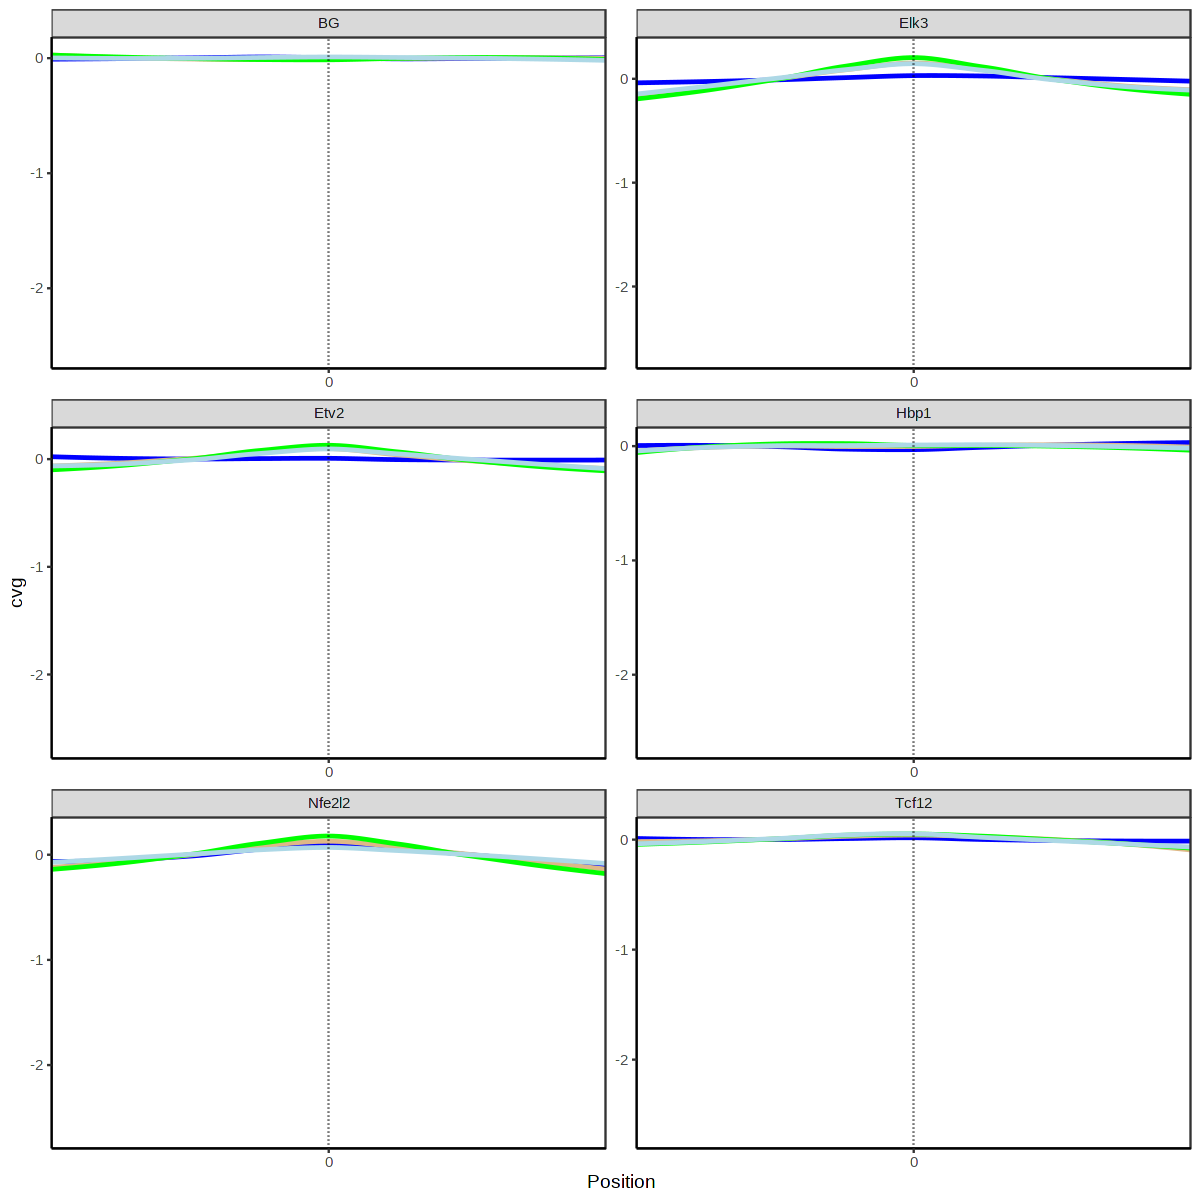

In [88]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(long_df, aes(x = pos, y = cvg, color = col)) +
  geom_line(size = 0, stat = 'identity') + 
  geom_smooth(method = 'loess',se=F) +
  scale_x_continuous(name = 'Position', expand = c(0, 0), breaks = c(0)) +  
  scale_color_identity() +
  geom_vline(xintercept = 0, linetype = 'dotted') + 
  facet_wrap(~ tf, ncol = 2, scale = "free") +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"))

In [64]:
long_df_sb <- long_df[long_df$tf %in% tf,] #Subsetting to just the transcription factors

In [65]:
head(long_df_sb)

pos,tf,Sample,cvg,col
<dbl>,<chr>,<chr>,<dbl>,<chr>
-500,Etv2,MEF_Dox_d1_Brg1,-0.05589971,green
-499,Etv2,MEF_Dox_d1_Brg1,-0.05966953,green
-498,Etv2,MEF_Dox_d1_Brg1,-0.05992599,green
-497,Etv2,MEF_Dox_d1_Brg1,-0.05982206,green
-496,Etv2,MEF_Dox_d1_Brg1,-0.06265925,green
-495,Etv2,MEF_Dox_d1_Brg1,-0.06204421,green


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 40 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 8 row(s) containing missing values (geom_path).”


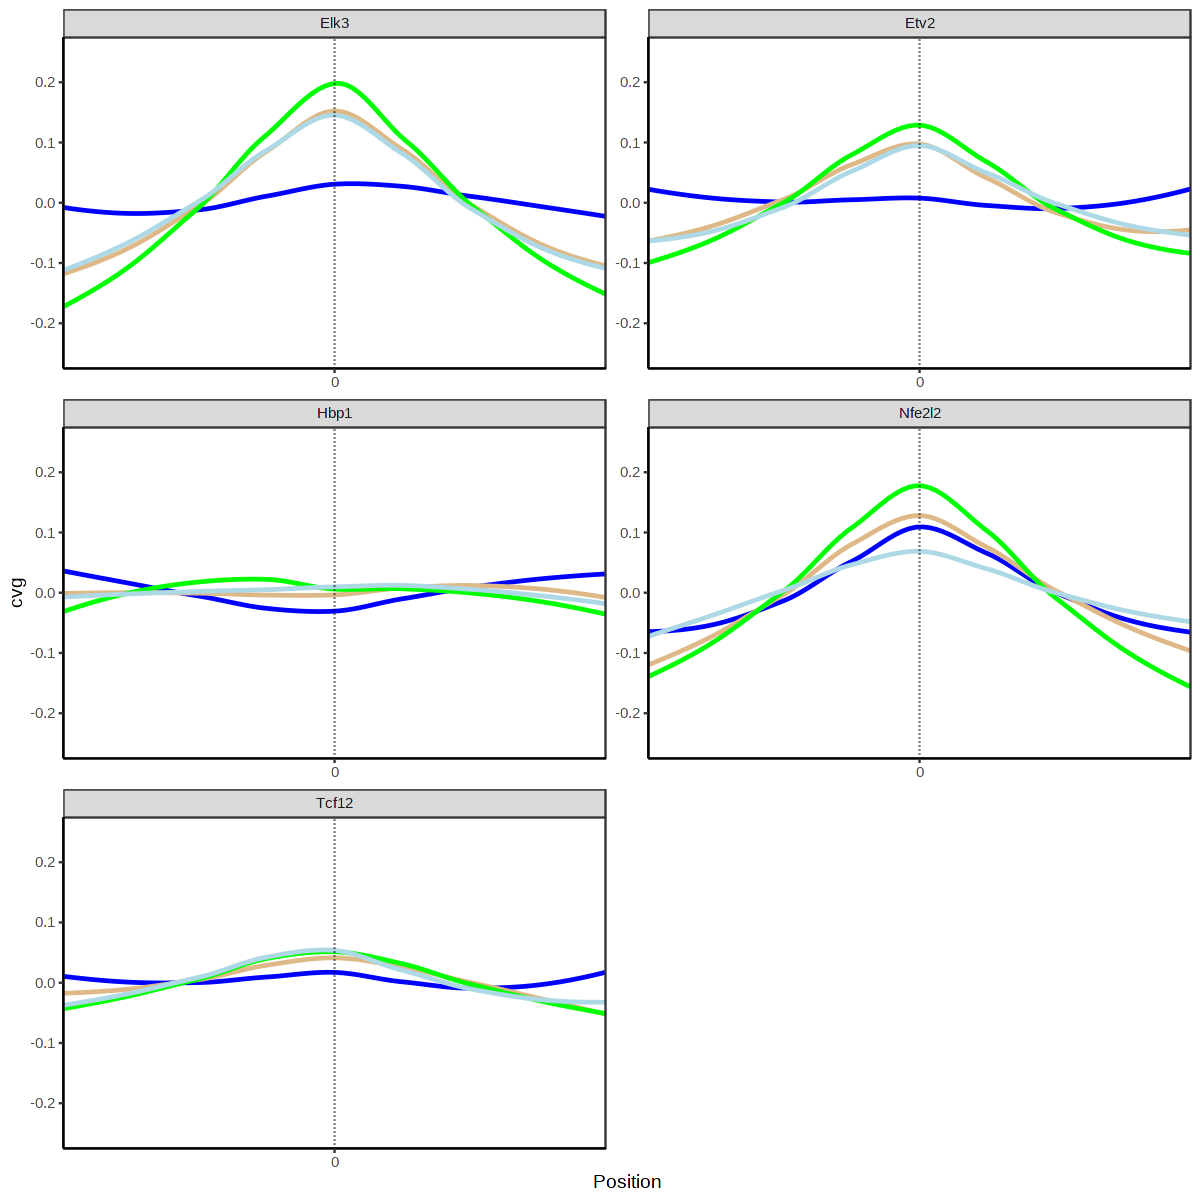

In [85]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(long_df_sb, aes(x = pos, y = cvg, color = col)) +
  geom_line(size = 0, stat = 'identity') + 
  geom_smooth(method = 'loess',se=F) +
  scale_y_continuous(limits = c(-0.25,0.25)) +
  scale_x_continuous(name = 'Position', expand = c(0, 0), breaks = c(0)) +  
  scale_color_identity() +
  geom_vline(xintercept = 0, linetype = 'dotted') + 
  facet_wrap(~ tf, ncol = 2, scale = "free") +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"))

### Based on the figure above we only use Etv2, Elk3 and Tcf12 that have similar profiles

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 139 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 8 row(s) containing missing values (geom_path).”


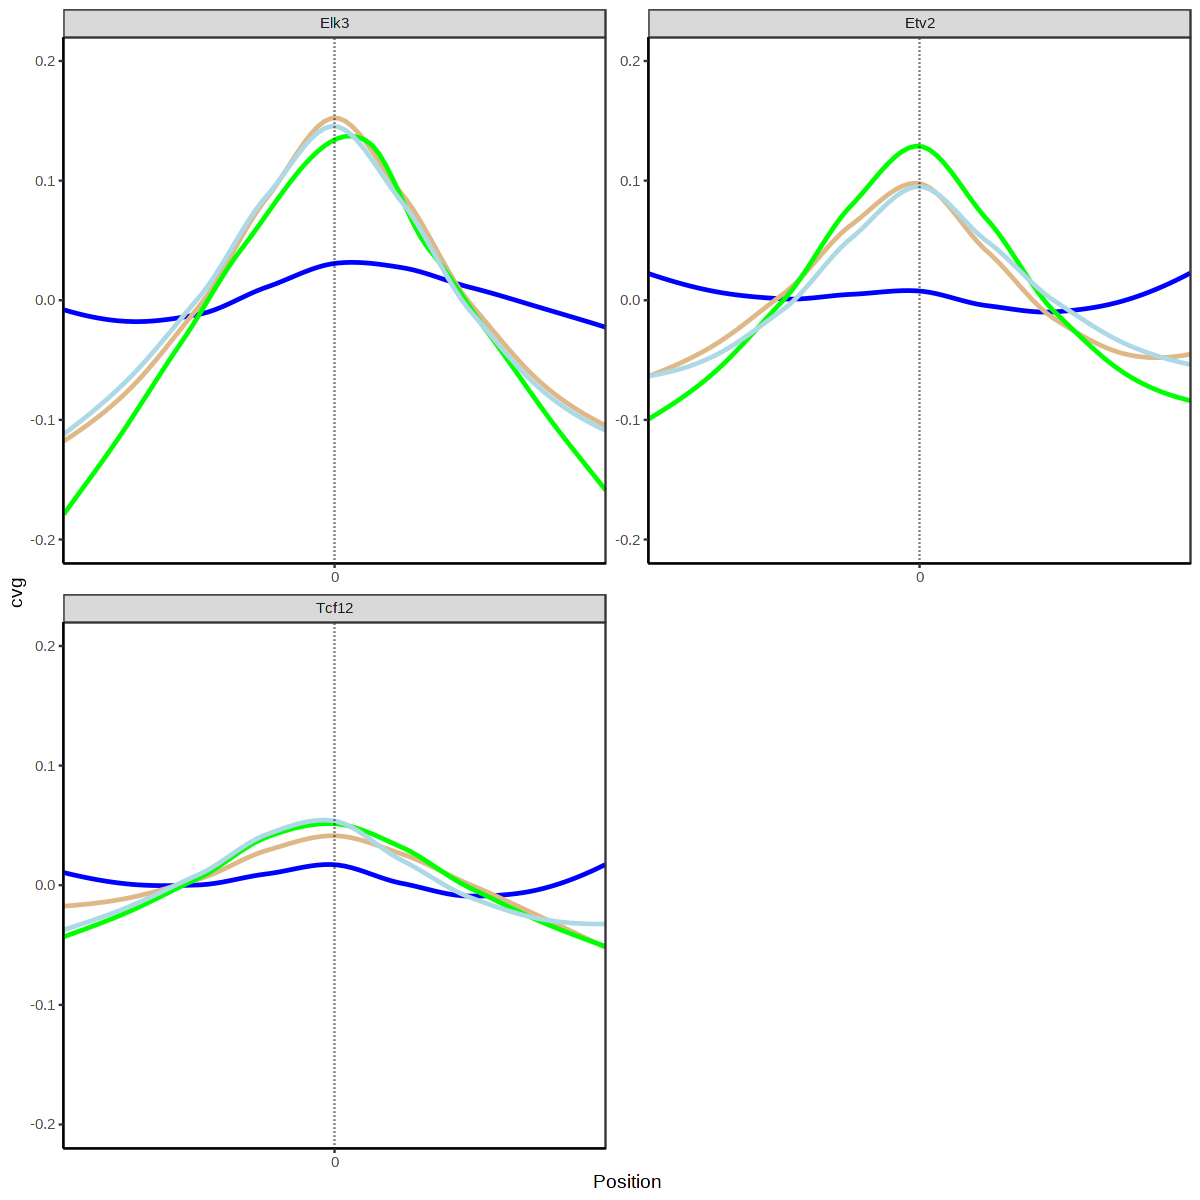

In [119]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(long_df_sb[long_df_sb$tf %in% c('Elk3','Etv2','Tcf12'),], aes(x = pos, y = cvg, color = col)) +
  geom_line(size = 0, stat = 'identity') + 
  geom_smooth(method = 'loess',se=F) +
  scale_y_continuous(limits = c(-0.2,0.2)) +
  scale_x_continuous(name = 'Position', expand = c(0, 0), breaks = c(0)) +  
  scale_color_identity() +
  geom_vline(xintercept = 0, linetype = 'dotted') + 
  facet_wrap(~ tf, ncol = 2, scale = "free") +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"))

# ATAC-Seq Data

## ## Reading ATAC-Seq data for Brg1 to be used for looking at average profile +500/-500 kb region of transcription factor (Etv2, Elk3, Nfe2l2, Tcf12, Hbp1)

In [44]:
s3_files <- c(
  'MEF_NoDox_rep1' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_NoDox_rep1_treat_pileup.bw',
	'MEF_NoDox_rep2' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_NoDox_rep2_treat_pileup.bw',
	'MEF_Dox_D7_Flk1pos_rep1' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D7_Flk1pos_rep1_treat_pileup.bw',
	'MEF_Dox_D7_Flk1pos_rep2' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D7_Flk1pos_rep2_treat_pileup.bw',
	'MEF_Brg1_KD_Dox_D7_rep1' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Brg1KO_MEF_reprogramming_version=20200817a/MEF_Brg1_KD_Dox_D7_rep1_treat_pileup.bw',
	'MEF_Brg1_KD_Dox_D7_rep2' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Brg1KO_MEF_reprogramming_version=20200817a/MEF_Brg1_KD_Dox_D7_rep2_treat_pileup.bw'
)

In [45]:
for (i in 1:length(s3_files)){
  sprintf('wget -x -c -nH %s', s3_files[i]) %>% system()
}

In [46]:
s3_files <- gsub('https://s3.msi.umn.edu/', './', s3_files)
message(sprintf('all bw_files exist: %s', all(file.exists(s3_files))))

all bw_files exist: TRUE



In [47]:
bw_atac <- lapply(s3_files, function(bw_file){lapply(tf_sample, function(t){
  rtracklayer::import.bw(
    bw_file, 
    which = trim(GenomicRanges::reduce(resize(t, fix = 'center', width = 1000)))
  ) 
})})

In [48]:
saveRDS(bw_atac,'bw_atac_new.rds')

## Need to run the commented out section on MSI as the session crashes

In [ ]:
#cvg_atac <- lapply(names(bw_atac), function(x){lapply(names(tf_sample), function(y){coverage(bw_atac[[x]][[y]], weight = 'score')[resize(tf_sample[[y]], fix = 'center', width = 1001)] %>% as.matrix()})})
#names(cvg_atac) <- names(bw_atac)
#for (i in names(bw_atac)){
#  names(cvg_atac[[i]]) <- names(tf_sample)
#}

In [ ]:
#cvg_mat_atac <- lapply(names(bw_atac), function(x){lapply(names(tf_sample), function(y){normalize(cvg_atac[[x]][[y]], method = 'standardize', range = c(0,1))})})
#names(cvg_mat_atac) <- names(bw_atac)
#for (i in names(bw_atac)){
#  names(cvg_mat_atac[[i]]) <- names(tf_sample)
#}

In [ ]:
#dat <- lapply(cvg_mat_atac, function(x){lapply(names(tf_sample), function(t){colMeans(x[[t]])})})
#for (i in names(bw_atac)){
#  names(dat[[i]]) <- names(tf_sample)
#}

In [ ]:
#tf_dat <- pmap(dat, bind_cols)
#pos <- 1:nrow(tf_dat$Etv2) - (nrow(tf_dat$Etv2) + 1)/2
#for (i in 1:length(tf_dat)){
#  tf_dat[[i]]$pos <- pos
#}
#for (i in names(tf_dat)){
 # tf_dat[[i]]$tf <- i
#}
#tf_df <- do.call('rbind', tf_dat)
#long_df <- tf_df%>% gather(Sample, cvg, names(bw_atac))
#head(long_df)


In [49]:
long_df_atac <- readRDS('long_df_atac.rds') 

In [50]:
col_atac <- c(
  'MEF_NoDox_rep1' = 'black',
  'MEF_NoDox_rep2' = 'black',
  'MEF_Dox_D7_Flk1pos_rep1' = 'violetred',
  'MEF_Dox_D7_Flk1pos_rep2' = 'violetred',
  'MEF_Brg1_KD_Dox_D7_rep1' = 'plum',
  'MEF_Brg1_KD_Dox_D7_rep2' = 'plum'
)

In [52]:
long_df_atac$col <- col_atac[match(long_df_atac$Sample, names(col_atac))]
head(long_df_atac)

pos,tf,Sample,cvg,col
<dbl>,<chr>,<chr>,<dbl>,<chr>
-500,Etv2,MEF_NoDox_rep1,0.06543949,black
-499,Etv2,MEF_NoDox_rep1,0.05979787,black
-498,Etv2,MEF_NoDox_rep1,0.06041422,black
-497,Etv2,MEF_NoDox_rep1,0.06083498,black
-496,Etv2,MEF_NoDox_rep1,0.05894920,black
-495,Etv2,MEF_NoDox_rep1,0.05989807,black


## ATAC-Seq Profile Plot

`geom_smooth()` using formula 'y ~ x'



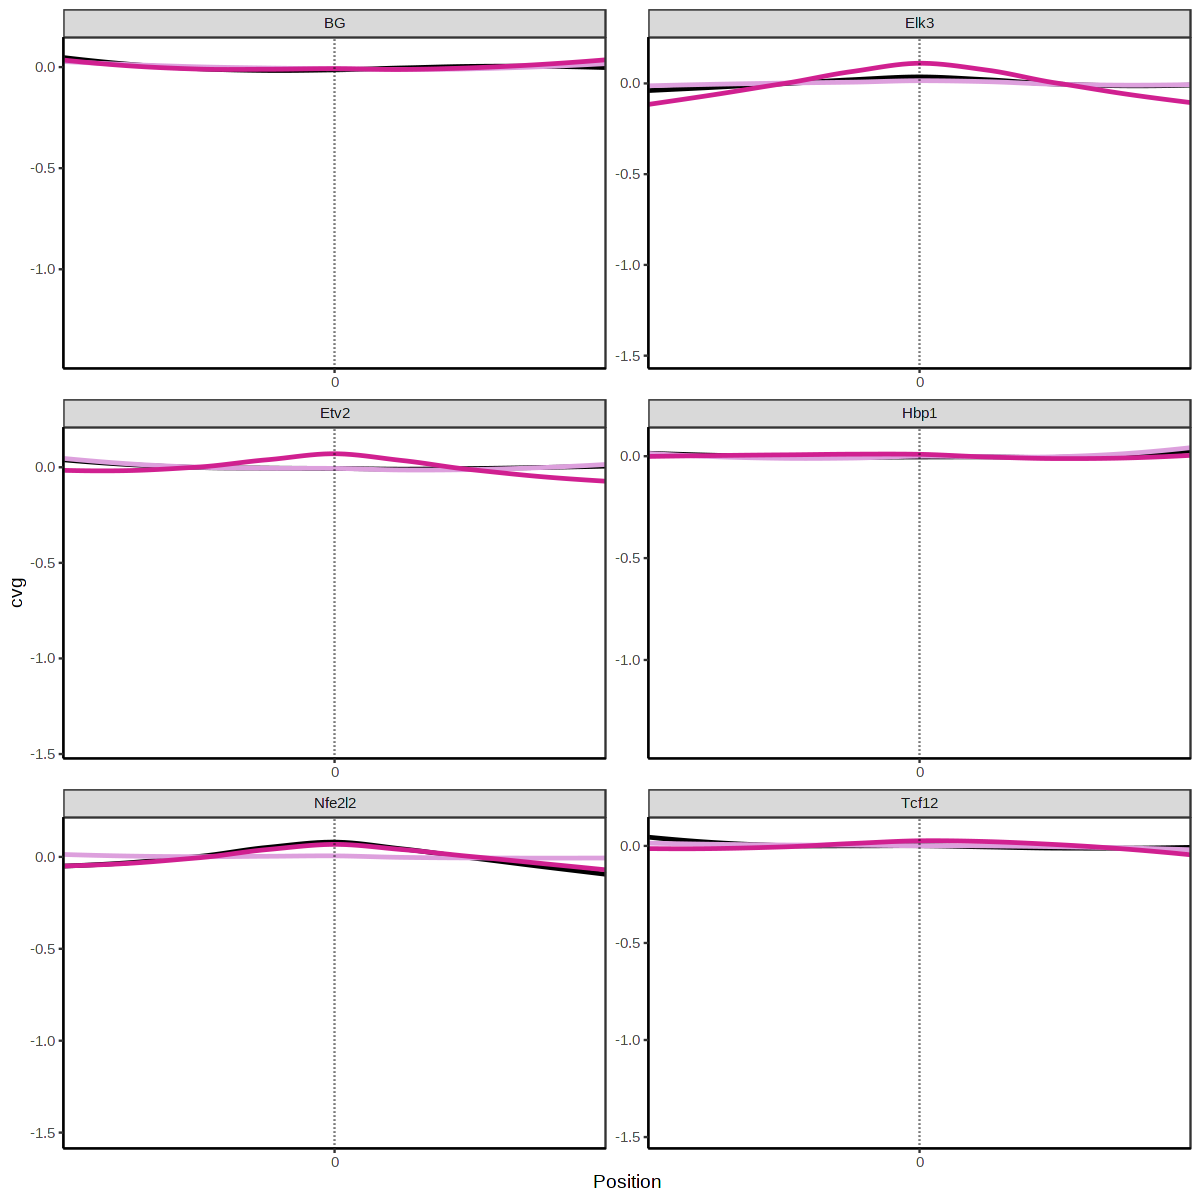

In [93]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(long_df_atac[long_df_atac$tf %in% c('Elk3','Etv2',], aes(x = pos, y = cvg, color = col)) +
  geom_line(size = 0, stat = 'identity') + 
  geom_smooth(method = 'loess',se=F) +
  scale_x_continuous(name = 'Position', expand = c(0, 0), breaks = c(0)) +  
  scale_color_identity() +
  geom_vline(xintercept = 0, linetype = 'dotted') + 
  facet_wrap(~ tf, ncol = 2, scale = "free") +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"))

In [73]:
long_atac_sub <- long_df_atac[long_df_atac$tf %in% tf,]
head(long_atac_sub) #Subsetting to just the transcription factors

pos,tf,Sample,cvg,col
<dbl>,<chr>,<chr>,<dbl>,<chr>
-500,Etv2,MEF_NoDox_rep1,0.06543949,black
-499,Etv2,MEF_NoDox_rep1,0.05979787,black
-498,Etv2,MEF_NoDox_rep1,0.06041422,black
-497,Etv2,MEF_NoDox_rep1,0.06083498,black
-496,Etv2,MEF_NoDox_rep1,0.05894920,black
-495,Etv2,MEF_NoDox_rep1,0.05989807,black


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 30 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 12 row(s) containing missing values (geom_path).”


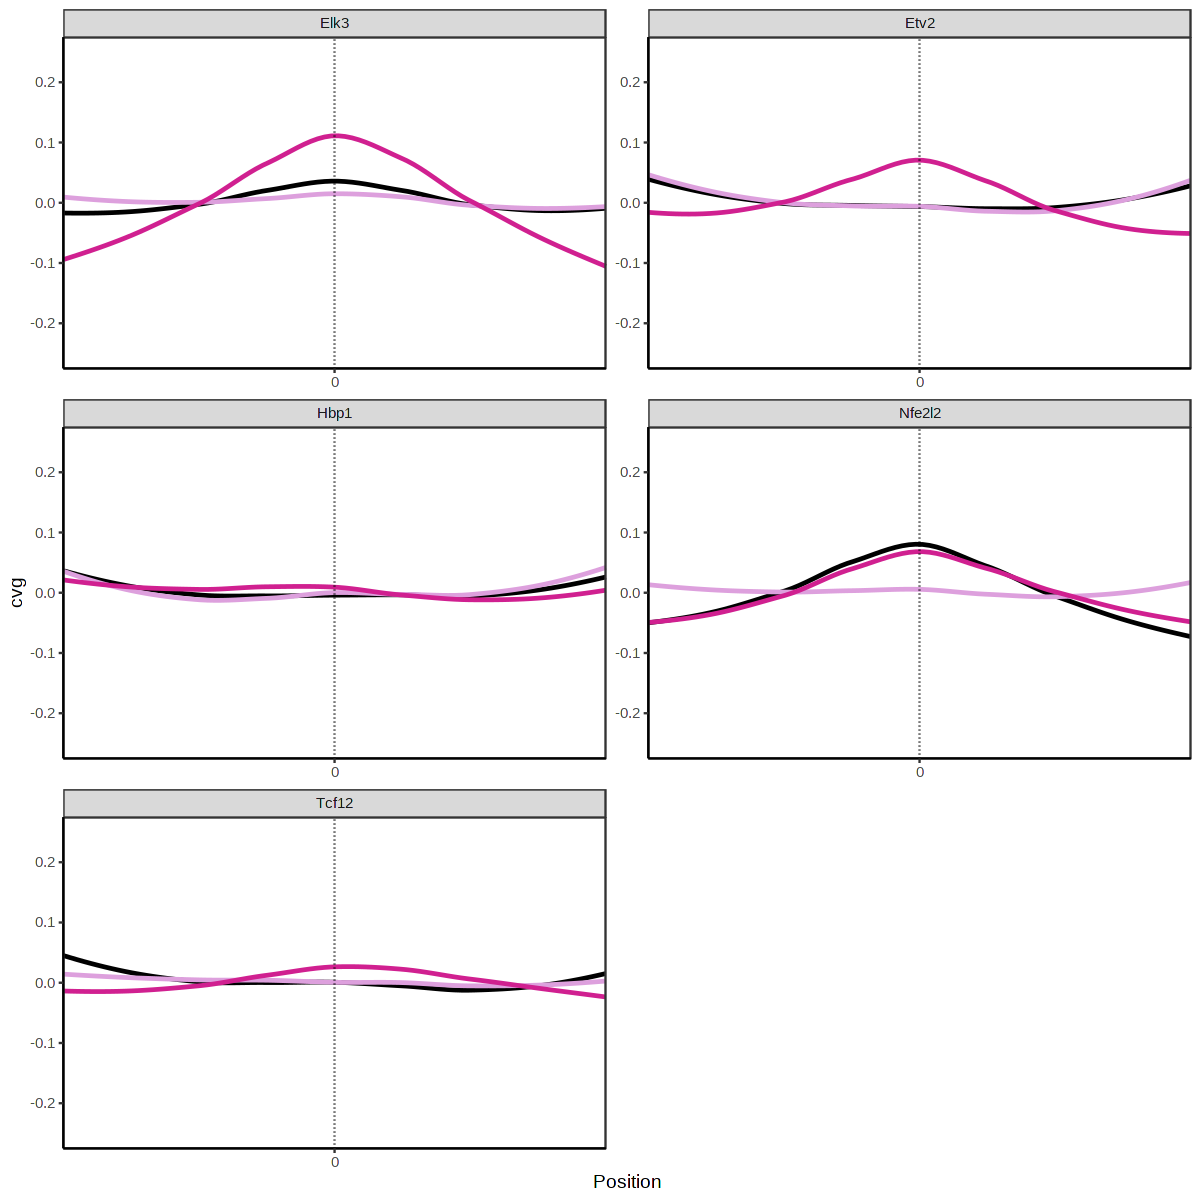

In [83]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(long_atac_sub, aes(x = pos, y = cvg, color = col)) +
  geom_line(size = 0, stat = 'identity') + 
  geom_smooth(method = 'loess',se=F) +
  scale_y_continuous(limits = c(-0.25,0.25)) +
  scale_x_continuous(name = 'Position', expand = c(0, 0), breaks = c(0)) +  
  scale_color_identity() +
  geom_vline(xintercept = 0, linetype = 'dotted') + 
  facet_wrap(~ tf, ncol = 2, scale = "free") +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"))

### Based on the figure above we only use Etv2, Elk3 and Tcf12 that have similar profiles

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 66 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 12 row(s) containing missing values (geom_path).”


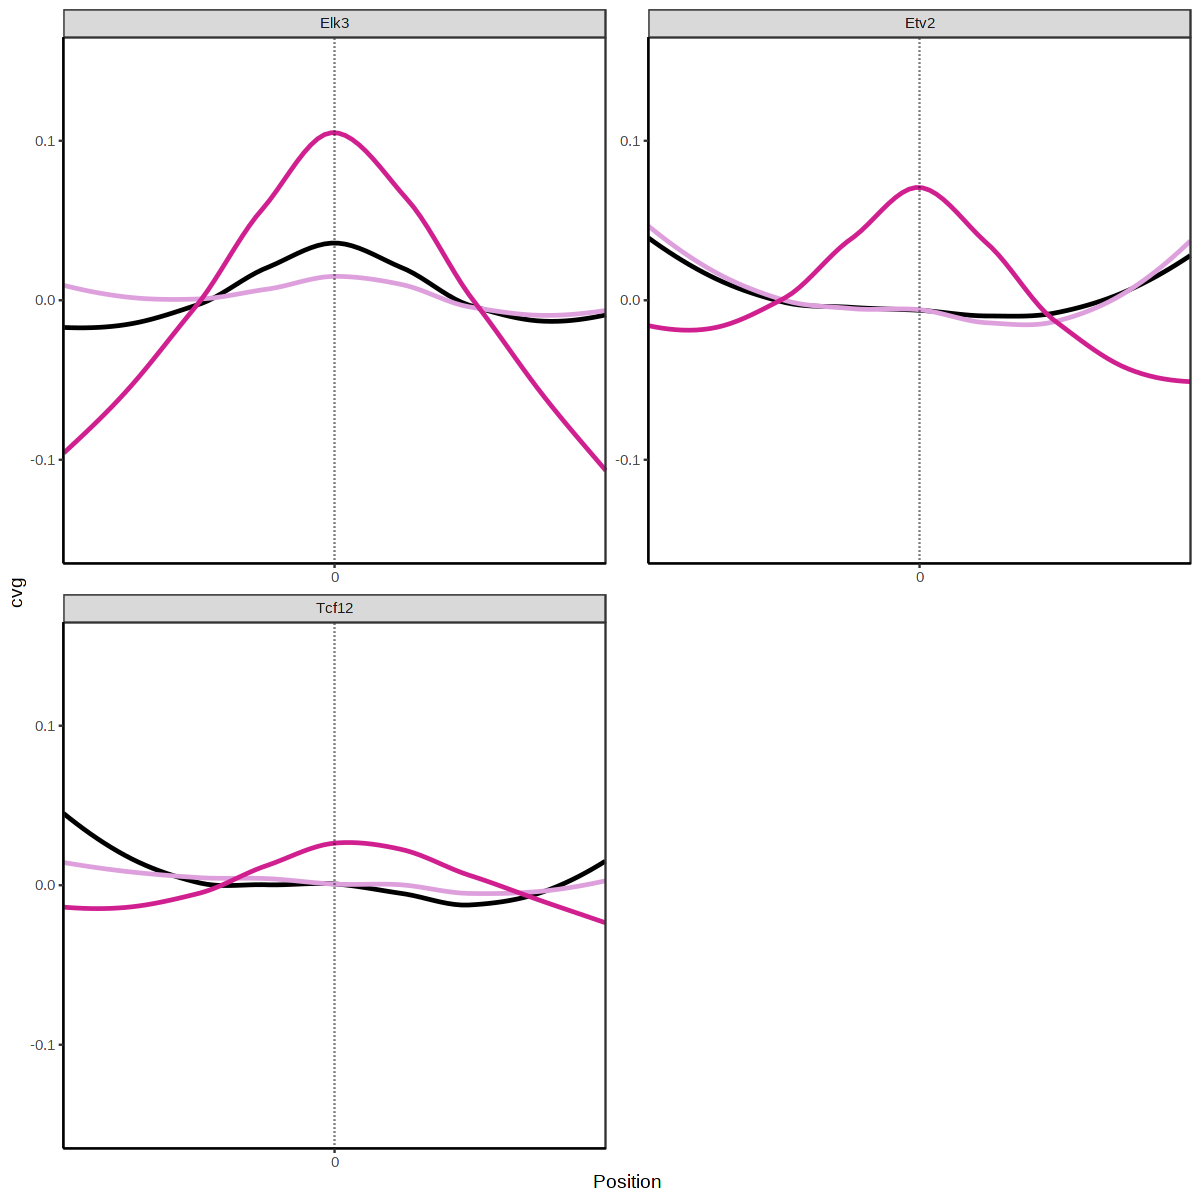

In [117]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(long_df_atac[long_df_atac$tf %in% c('Elk3','Etv2','Tcf12'),], aes(x = pos, y = cvg, color = col)) +
  geom_line(size = 0, stat = 'identity') + 
  geom_smooth(method = 'loess',se=F) +
  scale_y_continuous(limits = c(-0.15,0.15)) +
  scale_x_continuous(name = 'Position', expand = c(0, 0), breaks = c(0)) +  
  scale_color_identity() +
  geom_vline(xintercept = 0, linetype = 'dotted') + 
  facet_wrap(~ tf, ncol = 2, scale = "free") +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"))

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 158 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 6 row(s) containing missing values (geom_path).”


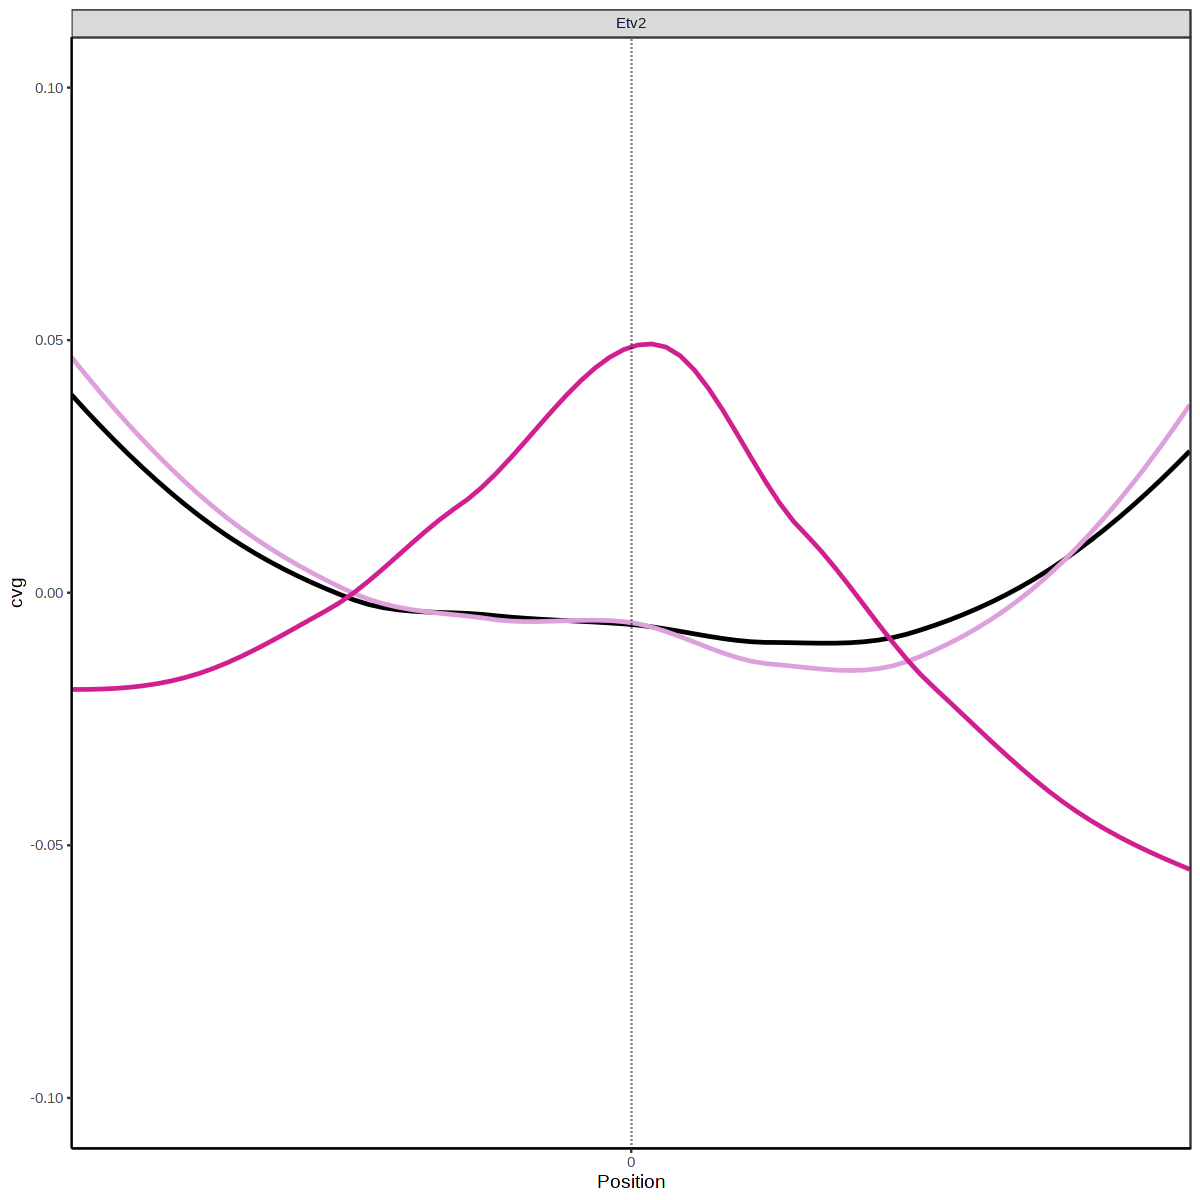

In [113]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(long_df_atac[long_df_atac$tf %in% c('Etv2'),], aes(x = pos, y = cvg, color = col)) +
  geom_line(size = 0, stat = 'identity') + 
  geom_smooth(method = 'loess',se=F) +
  scale_y_continuous(limits = c(-0.1,0.1)) +
  scale_x_continuous(name = 'Position', expand = c(0, 0), breaks = c(0)) +  
  scale_color_identity() +
  geom_vline(xintercept = 0, linetype = 'dotted') + 
  facet_wrap(~ tf, ncol = 2, scale = "free") +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"))

# End

Testing a TF

In [94]:
tcf <- sample(TF_motif[(elementMetadata(TF_motif)[, "Gene"] %in% 'Tcf4')], size = 10000 )

In [95]:
tcf

GRanges object with 10000 ranges and 3 metadata columns:
                                    seqnames              ranges strand |
                                       <Rle>           <IRanges>  <Rle> |
  ENSMUSG00000053477_LINE153_Tcf4_D     chr1   94448419-94448427      + |
  ENSMUSG00000053477_LINE153_Tcf4_D     chr9 114816377-114816385      + |
  ENSMUSG00000053477_LINE153_Tcf4_D    chr15   11457983-11457991      + |
  ENSMUSG00000053477_LINE153_Tcf4_D    chr16   17569825-17569833      + |
  ENSMUSG00000053477_LINE153_Tcf4_D     chr6   15931241-15931249      - |
                                ...      ...                 ...    ... .
  ENSMUSG00000053477_LINE153_Tcf4_D     chr9 121379755-121379763      - |
  ENSMUSG00000053477_LINE153_Tcf4_D     chrY   72192167-72192175      + |
  ENSMUSG00000053477_LINE153_Tcf4_D     chr7   47746557-47746565      - |
  ENSMUSG00000053477_LINE153_Tcf4_D     chr7 125754510-125754518      - |
  ENSMUSG00000053477_LINE153_Tcf4_D     chr8   66819467

In [96]:
bw <- lapply(s3_bw_files, function(bw_file){
  rtracklayer::import.bw(
   bw_file, 
   which = trim(GenomicRanges::reduce(resize(tcf, fix = 'center', width = 1000)))
  ) 
})

In [97]:
cvg_bd <- lapply(bw, function(x){coverage(x, weight = 'score')[resize(tcf, fix = 'center', width = 1001)] %>% as.matrix()})

In [98]:
cvg_bd <- lapply(cvg_bd, function(c){normalize(c, method = 'standardize', range = c(0,1))})

In [100]:
line_dat <- lapply(cvg_bd, function(l){colMeans(l)}) ##ColMeans to get the line plot
pos <- 1:1001 - (1001 + 1)/2
data <- do.call('cbind', line_dat) ##Making a dataframe that contains colmeans 
data <- cbind(data, pos = pos)
data <- as.data.frame(data)
head(data)

,MEF_Dox_d1_Brg1,MEF_Dox_d2_Brg1,MEF_Dox_d7_Brg1,MEF_NoDox_d0_Brg1,pos
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.02253424,-0.02826025,-0.001677431,0.03258015,-500
2,0.02259685,-0.02811446,-0.002314452,0.03067233,-499
3,0.02005616,-0.02717178,-0.004999024,0.03209079,-498
4,0.02085176,-0.02606053,-0.005446737,0.02985209,-497
5,0.02077325,-0.02616701,-0.004223773,0.02813484,-496
6,0.01914716,-0.02910887,-0.007597499,0.02876559,-495


In [101]:
long <- data %>% gather(Sample, cvg, c(names(bw)))
head(long)

,pos,Sample,cvg
,<dbl>,<chr>,<dbl>
1,-500,MEF_Dox_d1_Brg1,0.02253424
2,-499,MEF_Dox_d1_Brg1,0.02259685
3,-498,MEF_Dox_d1_Brg1,0.02005616
4,-497,MEF_Dox_d1_Brg1,0.02085176
5,-496,MEF_Dox_d1_Brg1,0.02077325
6,-495,MEF_Dox_d1_Brg1,0.01914716


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 row(s) containing missing values (geom_path).”


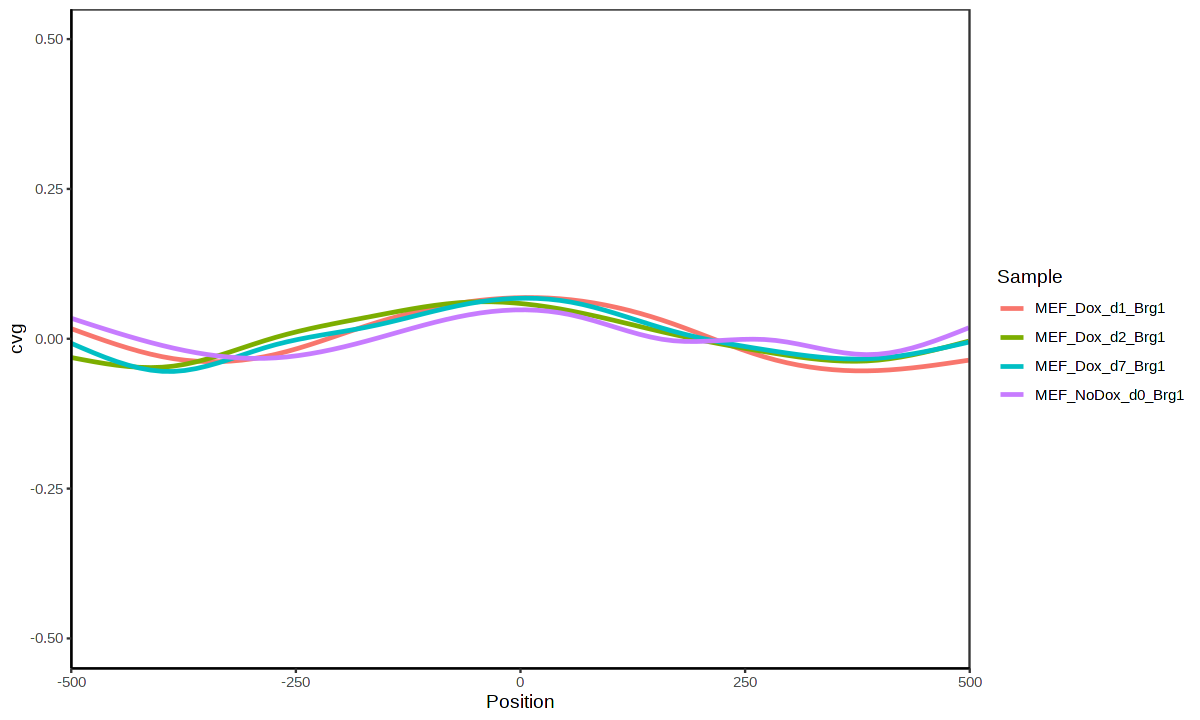

In [104]:
options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(long, aes(x = pos, y = cvg, color = Sample)) +
  geom_line(size = 0, stat = 'identity') + 
  geom_smooth(se = F) +
  scale_y_continuous(limits = c(-0.5, 0.5)) +
    scale_x_continuous(name = 'Position',  expand = c(0, 0))  +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))